In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

X = np.array([25, 30, 45, 50, 65, 80, 95, 110], dtype=np.float32).reshape(-1, 1)
y = np.array([180, 210, 310, 350, 430, 520, 610, 700], dtype=np.float32)

model = keras.Sequential([keras.layers.Dense(1, input_shape=(1,))])
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001), loss='mse')
model.summary()

history = model.fit(X, y, epochs=200, verbose=0)

X_test = np.array([[70]], dtype=np.float32)
print(f"Cena mieszkania 70m²: {model.predict(X_test, verbose=0)[0][0]:.2f} tys. PLN")

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Cena mieszkania 70m²: 456.97 tys. PLN


**Odpowiedzi:**
- Model ma 2 parametry (1 waga + 1 bias)
- Waga (weight) = cena za 1 m² mieszkania
- Bias = bazowa cena (wyraz wolny prostej)

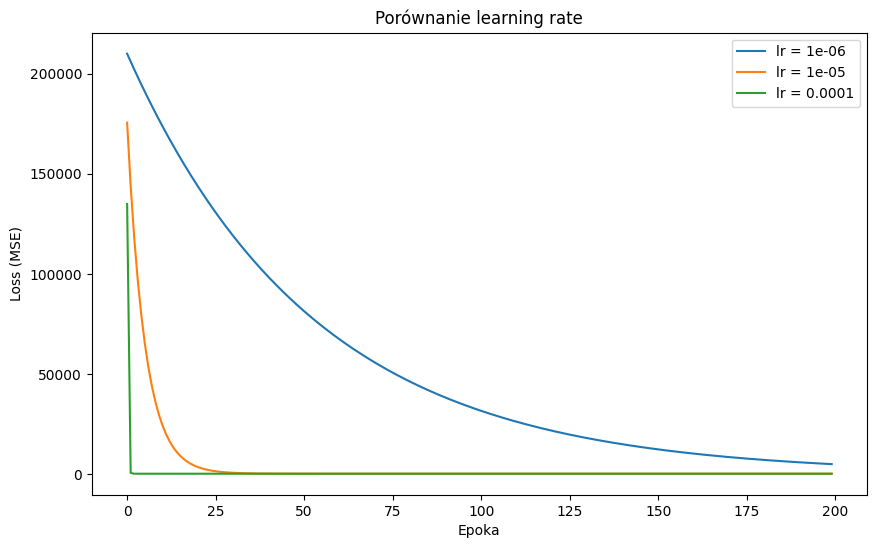

In [6]:
learning_rates = [0.000001, 0.00001, 0.0001]
histories = {}

for lr in learning_rates:
    model = keras.Sequential([keras.layers.Dense(1, input_shape=(1,))])
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr), loss='mse')
    histories[lr] = model.fit(X, y, epochs=200, verbose=0).history['loss']

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(histories[lr], label=f'lr = {lr}')
plt.xlabel('Epoka')
plt.ylabel('Loss (MSE)')
plt.title('Porównanie learning rate')
plt.legend()
plt.show()

**Wnioski:**
- Najlepszy lr = 0.0001 - najszybsza zbieżność i najniższy błąd końcowy
- Gdy lr za mały - uczenie bardzo wolne, model nie zbiega w 200 epokach
- Epoki do zbieżności: lr=0.000001 wymaga tysięcy epok, lr=0.00001 setek epok, lr=0.0001 ~100 epok